# Lab: Hierarchical Clustering

We have seen how the Kmeans algorithm formed clusters which expects pre-determined number of clusters to be known.
In this notebook we will move on to hierarchical clustering which has the benefit that one doesn't need to already know the number `k` of clusters in the data.
We will use the **iris** data to illustrate the concept in this notebook.

Read the iris data from `/dsa/data/all_datasets/` folder

In [1]:
import scipy.cluster.hierarchy as hca
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot
%matplotlib inline
np.set_printoptions(suppress=True)

data=pd.read_csv("/dsa/data/all_datasets/iris.txt")
data.head(1)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa


There is an extra column of data. Get rid of it.  

In [2]:
# pandas dataframe.drop will return a new object with labels in requested axis removed.

data = data.drop(['Unnamed: 0'], axis=1)

# Below line is subsetting all numeric columns Sepal.Length, Sepal.Width, Petal.Length, Petal.Width into new dataframe
num_data = data.iloc[:,:-1]

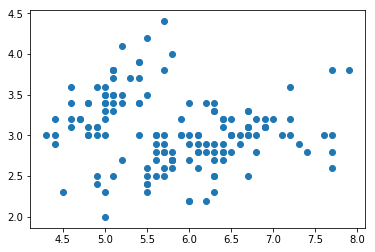

In [3]:
# Scatter plot between Sepal.Length, Sepal.Width

plt.scatter(num_data.iloc[:,0], num_data.iloc[:,1])
plt.show()

Next we will perform hierarchical agglomerative clustering by generating the linkage matrix.

**Reference:**
- [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.cluster.hierarchy.linkage.html)

**`ward`** is one of the methods that can be used to calculate the distance between newly formed clusters. 'ward' causes linkage() to use the Ward variance minimization algorithm.

There are some other common linkage methods like 'single', 'complete', 'average' 
along with different distance metrics like 'euclidean' (default), 
'Manhattan', 'hamming', 'cosine'. 
You can try different distance measures and clustering methods to make sure that the
data is not just clustered, but also to minimize the overall intra-cluster variance in euclidean space. 
For example, when dealing with clustering text documents, 
it may not look right to use a euclidean distance metric with long 
(binary) feature vectors (word-vectors in text clustering).

Explore the linked methods and metrics to make a informed choice between different options available. 

In [4]:
# Generate the linkage matrix
# hca is our alias for the scipy.cluster.hierarchy library
Z = hca.linkage(data.iloc[:,:-1], 'ward')

**`Cophenetic Correlation Coefficient`:**
Check the Cophenetic Correlation Coefficient of the clustering generated using `cophenet()` function.
This compares (correlates) the actual pairwise distances of all data samples to those implied by the hierarchical clustering. 
The closer the value is to 1, the better the clustering preserves the original distances.

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, cop_dist = cophenet(Z, pdist(num_data))
c

0.87282831533057148

The `linkage()` function will use the supplied method and metric to calculate the 
distances of the clusters starting with all the **`n`** individual data points as 
singleton clusters and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. 

It will return an array of length `n - 1` giving the information about the `n - 1` cluster merges which it did to pairwise merge the `n` singleton clusters. 
`Z[i]` will tell which clusters were merged in the i-th iteration as shown below.

In [6]:
Z[0]

array([ 101.,  142.,    0.,    2.])

So each row of the resulting array has the format `[idx1, idx2, dist, sample_count]`. 
Rows 101 and 142 in the dataset are clustered together to form the first cluster. 
These two samples have 0 distance and created a cluster with a total of 2 samples.

In [7]:
Z[1]

array([  7. ,  39. ,   0.1,   2. ])

In second iteration, rows 7 and 39 in the dataset are clustered together to form a cluster. These two samples have a distance of 0.1. Have a look at the first 30 iterations.

In [8]:
# print without the index:
# Z[:30]

# print with the index, for ease of reading
for index, z in enumerate(Z):
    print(index, z)
    if index == 29: #index 29 is the 30th iteration
        break;

0 [ 101.  142.    0.    2.]
1 [  7.   39.    0.1   2. ]
2 [  0.   17.    0.1   2. ]
3 [  9.   34.    0.1   2. ]
4 [ 128.   132.     0.1    2. ]
5 [ 10.   48.    0.1   2. ]
6 [  4.          37.           0.14142136   2.        ]
7 [ 19.          21.           0.14142136   2.        ]
8 [ 29.          30.           0.14142136   2.        ]
9 [ 57.          93.           0.14142136   2.        ]
10 [ 80.          81.           0.14142136   2.        ]
11 [ 116.          137.            0.14142136    2.        ]
12 [  8.          38.           0.14142136   2.        ]
13 [  3.          47.           0.14142136   2.        ]
14 [ 27.          28.           0.14142136   2.        ]
15 [ 82.          92.           0.14142136   2.        ]
16 [ 95.          96.           0.14142136   2.        ]
17 [ 127.          138.            0.14142136    2.        ]
18 [  1.          45.           0.14142136   2.        ]
19 [ 63.          91.           0.14142136   2.        ]
20 [ 65.          75.     

If you can observe the sample_count column, until iteration 22 the algorithm only directly merged original samples. Also, there has been a monotonic increase in the distance.

In iteration 22 the algorithm merged cluster indices 40 with 152. 
Remember that there are only 150 samples in the iris dataset meaning the 
original sample indices are 0 to 149 for 150 samples. 
All indices where idx >= len(num_data) actually refer to the clusters 
formed in `Z[idx - len(num_data)]`.

Simply put, while idx 149 corresponds to `num_data[149]`, `idx` 150 corresponds to the cluster formed in `Z[0]`, `idx` 151 to `Z[1]`, 152 to `Z[2]` and so on...

Hence, the merge iteration 22 that merged sample 40 with samples 0 and 17 which
were previously merged in iteration 2 (that is 152 - 2). 
Again we are calling it iteration 2 using this formula `Z[idx - len(num_data)]`.

Let's check out the points coordinates to see if this makes sense:

In [9]:
num_data.loc[[0, 17, 40], :]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
17,5.1,3.5,1.4,0.3
40,5.0,3.5,1.3,0.3


The points seem pretty close. Plot the points highlighted to verify them.

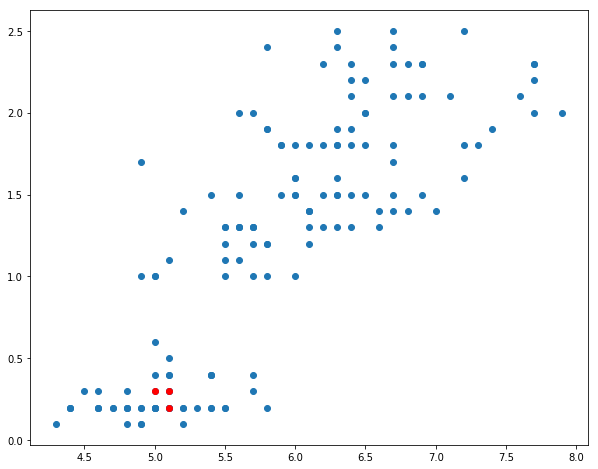

In [10]:
# PLotting Sepal.Length vs Petal.Width
idxs = [0, 17, 40]

plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,0], num_data.iloc[:,3])  # plot all points

# Highlight the points of interest in Red color
plt.scatter(num_data.iloc[idxs,0], num_data.iloc[idxs,3], c='r')  # plot interesting points in red again
plt.show()

All 3 red dots are pretty close to each other as predicted. Lets check the results of 28th iteration. The algorithm merged indices 88 to 95 and 96. 

In [11]:
num_data.loc[[88, 95, 96], :]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
88,5.6,3.0,4.1,1.3
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3


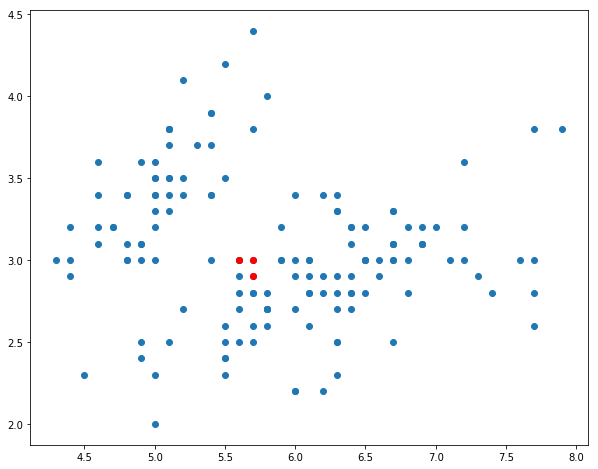

In [12]:
# PLotting Sepal.Length vs Petal.Width
idxs = [88, 95, 96]
plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,0], num_data.iloc[:,1])  # plot all points

# Highlight the points of interest in Red color
plt.scatter(num_data.iloc[idxs,0], num_data.iloc[idxs,1], c='r')  # plot interesting points in red again
plt.show()

### Plot the Dendogram

A dendrogram is a visualization technique that is in the form of a tree showing the order and distances of merges during the hierarchical clustering.

In [13]:
y=hca.linkage(num_data,metric="euclidean",method="ward")

`linkage()` performs agglomerative clustering on the condensed distance matrix `y`. 
`y` must be a ${n \choose 2}$ sized vector where `n` is the number of original 
observations paired in the distance matrix. 

In the below code block, the `truncate_mode='lastp'` option tells python to show just the last `p` non-singleton clusters formed in the linkage.
All other non-singleton clusters are contracted into leaf nodes. 

The number p indicates number of clusters to be shown. Its gives a truncated dendrogram, which only shows the last `p=25` out of the 149 merges.

Text(0.5, 0.9, 'Dendrogram (center, euclidean, ward)')

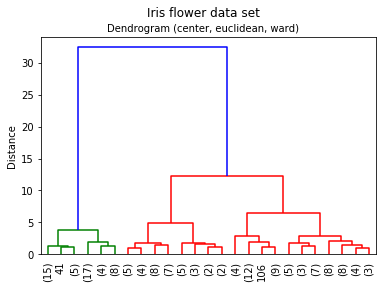

In [14]:
plot=hca.dendrogram(y,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Iris flower data set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

**Reference:**

- [scipy.cluster.hierarchy.dendrogram(data,....)](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram)

dendogram() plots the hierarchical clustering as a dendrogram. 
The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. 
The height of the top of the U-link is the distance between its children clusters. 
It is also the cophenetic distance between original observations in the two children clusters.
It is expected that the distances in `data[:,2]` be monotonic, otherwise crossings appear in the dendrogram.

- x axis labels: if nothing is specified then they are the indices of samples in num_data
- y axis labels: represent the distances (of the 'ward' method in this case)

Interpreting the dendogram:

Starting from each label at the bottom, you can see a vertical line up to a horizontal line. The height of that horizontal line tells you about the distance at which this label was merged into another label or cluster. 

Summarizing:

Horizontal lines are cluster merges. 
Vertical lines tell you which clusters/labels were part of merge forming that new cluster. 
Heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster.
You can also see that from distances > 12 up there's a huge jump of the distance to the final merge at a distance of approx 33. 
Let's have a look at the distances of the last 4 merges:

In [15]:
Z[-4:,2]

array([  4.84770851,   6.39940682,  12.30039605,  32.447607  ])

Such merges in the dendrogram are interesting. They indicate that something has been merged that may be shouldn't be merged. Simply put, maybe the things that were merged really don't belong to the same cluster suggesting that maybe there are just 2 different clusters.

The colors of the clusters come from color_threshold argument of dendrogram(). Because it is not specified here, it automatically picked a distance cut-off value of 70 % of the final merge and then colored the clusters.

### Selecting a Distance Cut-Off or Determining the Number of Clusters

As explained above already, a huge jump in distance is typically what we're interested in when arguing for a certain number of clusters. When you have to pick the number of clusters manually, that is probably the best method as it allows us to gain some insights into the data and to perform some sanity checks on the edge cases. In this case the distance cut off could be 10, as the jump is pretty obvious. 

When automatically picking the number of clusters there are a couple of common methods that can be used. 

#### Inconsistency Method
"inconsistency" method is one of the defaults for the fcluster() function in scipy.

The question driving the inconsistency method is "what makes a distance jump a jump?". It answers this by comparing each cluster merge's height `h` to the average `avg` and normalizing it by the standard deviation. Link statistics are computed over link heights for links `d` levels below the cluster `i`.

$$inconsistency=\frac{h−avg}{std}$$
The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5

In [16]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[  0.59108975,   0.45392614,  17.        ,   2.91895623],
       [  0.53055241,   0.41958884,  21.        ,   3.30847806],
       [  0.55682942,   0.48059093,  20.        ,   3.11450149],
       [  0.8374815 ,   0.69532383,  15.        ,   2.84249906],
       [  0.79911507,   0.66538924,  24.        ,   3.11141575],
       [  0.76914495,   0.74381406,  26.        ,   4.11246284],
       [  0.89598496,   0.93038191,  26.        ,   4.24742088],
       [  1.28888887,   1.28477111,  25.        ,   3.97776532],
       [  1.85911499,   2.3737124 ,  30.        ,   4.39871361],
       [  3.06437262,   6.029791  ,  30.        ,   4.87301042]])

There is no paricular golden rule to pick the depth limit in the inconsistencies. See what happens if depth is set to 3 instead.

In [17]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[  1.04415572,   0.47077171,   6.        ,   1.85211759],
       [  0.93605888,   0.50753029,   7.        ,   1.93622727],
       [  1.00119478,   0.59481487,   7.        ,   1.76935019],
       [  1.3215276 ,   0.89717505,   6.        ,   1.66345602],
       [  1.54618861,   0.78070631,   7.        ,   1.6949127 ],
       [  1.60084704,   1.04636159,   7.        ,   2.12852383],
       [  1.87864673,   1.37553667,   7.        ,   2.15847519],
       [  2.63219605,   1.82414912,   7.        ,   2.06518794],
       [  4.69102252,   3.74990448,   7.        ,   2.02921797],
       [  9.01617053,  10.95274921,   7.        ,   2.13932009]])

The inconsistency values heavily depend on the depth of the tree you calculate the averages over. 

#### Elbow Method

The elbow method tries to find the clustering step where the acceleration of distance growth is the biggest.

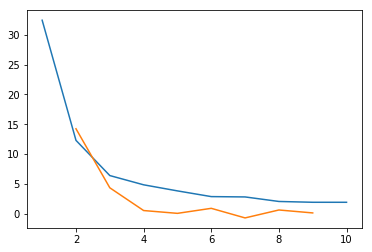

clusters: 2


In [18]:
import matplotlib.pyplot as plt

# Take last 10 merge distances into variable last
last = Z[-10:, 2]

# reverse the elements in variable last and assign them to last_rev. The index '-1' starts the indexing from the last.
last_rev = last[::-1]

# create an array with indexes 1,2,3...10
idxs = np.arange(1, len(last) + 1)

# Plot the merge distances. last_rev has merge with highest value at index 0. 
plt.plot(idxs, last_rev)

# Calculate the 2nd order discrete difference along the given axis.
acceleration = np.diff(last, 2)  # 2nd derivative of the distances

# reverse the elements in variable acceleration and assign them to acceleration_rev. 
acceleration_rev = acceleration[::-1]

# Plot the 2nd order distances. 
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

# Find the index of largest value in acceleration_rev to decide the number of clusters. 
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

In [19]:
print(last)
print(acceleration)
print(idxs)
print(idxs[:-2])
print(acceleration_rev)

[  1.91608028   1.91875287   2.05363058   2.81393883   2.86941764
   3.82805262   4.84770851   6.39940682  12.30039605  32.447607  ]
[  0.13220512   0.62543055  -0.70482945   0.90315617   0.06102091
   0.53204242   4.34929092  14.24622171]
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3 4 5 6 7 8]
[ 14.24622171   4.34929092   0.53204242   0.06102091   0.90315617
  -0.70482945   0.62543055   0.13220512]


### Retrieve the Clusters

The `fcluster()` function is used for retrieving the clusters, for different ways of determining k.

#### Knowing max_d:

Once the max distance is determined with help of a dendrogram, then the cluster id for each of the samples can be extracted using the below code.

In [20]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### Knowing k:

In [21]:
k=2
fcluster(Z, k, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### Using the Inconsistency Method (default):

Inconsistency Method is the default method for the `fcluster()` function. 

In [22]:
from scipy.cluster.hierarchy import fcluster
clusters=fcluster(Z, 8, depth=10)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### Visualizing Your Clusters

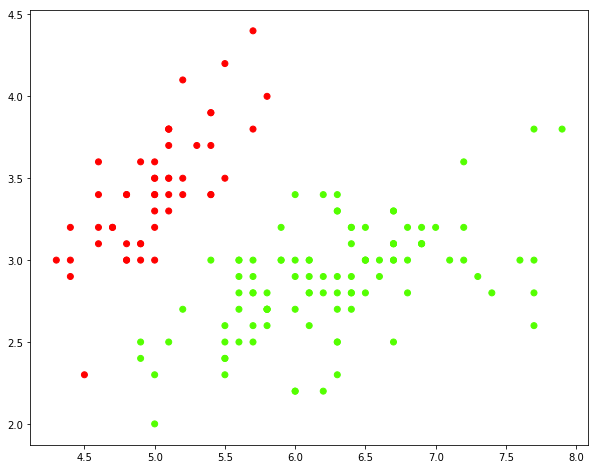

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,0], num_data.iloc[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

----

There are many subtle parameterization and variations of heirarchical clustering.
Please see the SciKit Learn documentation as a starting point for many options.

----